In [8]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [35]:
df_output = pd.read_csv('/Users/zacharyburpee/Desktop/Columbia/Spring 2023/Advanced Big Data & Ai/gc_out_data.csv')
df_plot = df_output.dropna()
# reverse rows
df_output = df_plot.iloc[::-1]
df_output = df_output.drop('date', axis=1)
data = df_output.astype('float')
data = data.astype('float')
data

,open,high,low,close,volume
5698,275.8,275.8,275.8,275.8,2.0
5696,274.0,274.0,274.0,274.0,125.0
5682,278.4,278.4,278.4,278.4,3511.0
5681,277.5,277.5,275.1,275.6,631.0
5680,274.6,274.6,272.0,273.6,22.0
...,...,...,...,...,...
4,1873.1,1877.8,1873.1,1874.6,1236.0
3,1877.2,1897.4,1877.2,1895.5,59.0
2,1899.0,1920.9,1898.3,1918.4,512.0
1,1920.1,1920.1,1912.4,1912.4,512.0


In [36]:
train = data.iloc[:-1, :]
train

,open,high,low,close,volume
5698,275.8,275.8,275.8,275.8,2.0
5696,274.0,274.0,274.0,274.0,125.0
5682,278.4,278.4,278.4,278.4,3511.0
5681,277.5,277.5,275.1,275.6,631.0
5680,274.6,274.6,272.0,273.6,22.0
...,...,...,...,...,...
5,1877.8,1878.1,1871.6,1871.6,101.0
4,1873.1,1877.8,1873.1,1874.6,1236.0
3,1877.2,1897.4,1877.2,1895.5,59.0
2,1899.0,1920.9,1898.3,1918.4,512.0


In [43]:
out = pd.DataFrame(data['close'].values.reshape(-1, 1))
out = out.iloc[1:, :]
out

,0
1,274.0
2,278.4
3,275.6
4,273.6
5,273.1
...,...
5199,1874.6
5200,1895.5
5201,1918.4
5202,1912.4


In [65]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(data['close'].values.reshape(-1, 1))
scaled_open = scaler.fit_transform(data['open'].values.reshape(-1, 1))
scaled_volume = scaler.fit_transform(data['volume'].values.reshape(-1, 1))
scaled_high = scaler.fit_transform(data['high'].values.reshape(-1, 1))
scaled_low = scaler.fit_transform(data['low'].values.reshape(-1, 1))
scaled_data = []
for i in range(len(scaled_close)):
    temp = []
    temp.append(scaled_open[i][0])
    temp.append(scaled_high[i][0])
    temp.append(scaled_low[i][0])
    temp.append(scaled_close[i][0])
    temp.append(scaled_volume[i][0])
    scaled_data.append(temp)

scaled_data = np.array(scaled_data)
scaled_out = scaler.fit_transform(out['close'].values.reshape(-1, 1))

In [94]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1, 1))
scaled_out = scaler.fit_transform(out['close'].values.reshape(-1, 1))

In [95]:
print(scaled_data)
print(scaled_out)

[[0.01152305]
 [0.01052104]
 [0.01297039]
 ...
 [0.92590737]
 [0.92256736]
 [0.91967268]]
[[0.01052104]
 [0.01297039]
 [0.01141171]
 ...
 [0.92256736]
 [0.91967268]
 [0.91811401]]


In [107]:
# how many days do i want to base my predictions on ?
'''
prediction_days = 1

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
'''
x_train = scaled_data
y_train = scaled_out

[[0.01152305]
 [0.01052104]
 [0.01297039]
 ...
 [0.92590737]
 [0.92256736]
 [0.91967268]]
[[0.01052104]
 [0.01297039]
 [0.01141171]
 ...
 [0.92256736]
 [0.91967268]
 [0.91811401]]


In [188]:
model = Sequential()
    
model.add(Dense(64, input_shape = (1,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [189]:
model.summary()
model.compile(optimizer='adam', loss='mse')

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 1, 64)             128       
                                                                 
 dense_124 (Dense)           (None, 1, 64)             4160      
                                                                 
 dense_125 (Dense)           (None, 1, 32)             2080      
                                                                 
 dense_126 (Dense)           (None, 1, 32)             1056      
                                                                 
 dense_127 (Dense)           (None, 1, 1)              33        
                                                                 
Total params: 7,457
Trainable params: 7,457
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.fit(x_train, 
          y_train, 
          epochs=30,
          batch_size = 8)

Epoch 1/30


2023-03-17 15:16:47.994377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


651/651 [==============================] - 8s 12ms/step - loss: 0.0028
Epoch 2/30
651/651 [==============================] - 7s 11ms/step - loss: 8.0908e-05
Epoch 3/30
651/651 [==============================] - 7s 11ms/step - loss: 8.4318e-05
Epoch 4/30
651/651 [==============================] - 7s 11ms/step - loss: 9.8798e-05
Epoch 5/30
651/651 [==============================] - 7s 11ms/step - loss: 8.9574e-05
Epoch 6/30
651/651 [==============================] - 7s 11ms/step - loss: 8.9907e-05
Epoch 7/30
651/651 [==============================] - 7s 11ms/step - loss: 9.1560e-05
Epoch 8/30
651/651 [==============================] - 7s 11ms/step - loss: 9.3764e-05
Epoch 9/30
651/651 [==============================] - 8s 12ms/step - loss: 9.8018e-05
Epoch 10/30
651/651 [==============================] - 7s 11ms/step - loss: 8.7202e-05
Epoch 11/30
651/651 [==============================] - 7s 11ms/step - loss: 9.2671e-05
Epoch 12/30
651/651 [==============================] - 7s 11ms/step

In [191]:
df = pd.read_csv('/Users/zacharyburpee/Desktop/Columbia/Spring 2023/Advanced Big Data & Ai/test.csv')
df = df.dropna()
# reverse rows
df = df.iloc[::-1]
df = df.drop('date', axis=1)
test_data = df.astype('float')
test_data

,open,high,low,close,volume
37,1911.1,1911.1,1903.1,1904.4,1027.0
36,1922.1,1931.8,1922.1,1922.1,371.0
35,1922.1,1928.5,1921.4,1926.4,1346.0
34,1926.5,1927.1,1915.0,1927.1,218.0
33,1931.8,1936.8,1931.8,1933.9,201.0
32,1941.2,1941.2,1939.8,1941.2,7.0
31,1936.6,1937.1,1927.1,1929.1,131.0
30,1928.6,1928.6,1928.6,1928.6,150902.0
29,1928.3,1933.6,1920.3,1922.9,27220.0
28,1923.0,1930.4,1900.6,1929.5,1910.0


In [192]:
test_outputs = pd.read_csv('/Users/zacharyburpee/Desktop/Columbia/Spring 2023/Advanced Big Data & Ai/test_outputs.csv')
test_outputs = test_outputs.dropna()
# reverse rows
test_outputs = test_outputs.iloc[::-1]
test_outputs = test_outputs.astype('float')
test_outputs

,close
37,1922.1
36,1926.4
35,1927.1
34,1933.9
33,1941.2
32,1929.1
31,1928.6
30,1922.9
29,1929.5
28,1927.8


In [193]:
#actual_prices = test_data.values
model_inputs = scaler.fit_transform(test_data['close'].values.reshape(-1, 1))
model_outputs = test_outputs['close'].values.reshape(-1, 1)
#print(model_inputs)
#print(model_outputs)

In [194]:
x_test = model_inputs

predicted_prices = model.predict(x_test)
prices = []
for price in predicted_prices:
    prices.append(price[0])
#predicted_prices = scaler.inverse_transform(predicted_prices)
prices = np.array(prices)
print(prices)
predicted_prices = scaler.inverse_transform(prices)

2/2 [==============================] - 0s 52ms/step
[[0.72387266]
 [0.8569804 ]
 [0.8893139 ]
 [0.8945774 ]
 [0.94570935]
 [1.000601  ]
 [0.9096163 ]
 [0.9058565 ]
 [0.862996  ]
 [0.91262394]
 [0.89984107]
 [0.81336796]
 [0.41088346]
 [0.43597123]
 [0.47789708]
 [0.5209625 ]
 [0.43597123]
 [0.41012323]
 [0.32725757]
 [0.34322253]
 [0.19410986]
 [0.25199425]
 [0.23983046]
 [0.18500143]
 [0.17741105]
 [0.07439312]
 [0.00708508]
 [0.06644943]
 [0.15538158]
 [0.21981516]
 [0.18879661]
 [0.2953277 ]
 [0.29684818]
 [0.04186771]
 [0.03453331]
 [0.15819934]
 [0.40404138]
 [0.7787786 ]]


2023-03-17 15:21:12.028647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


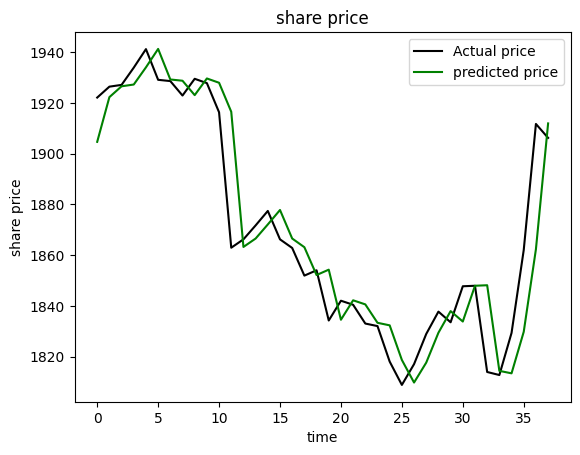

In [195]:
# all day 30 epochs
plt.plot(model_outputs, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()

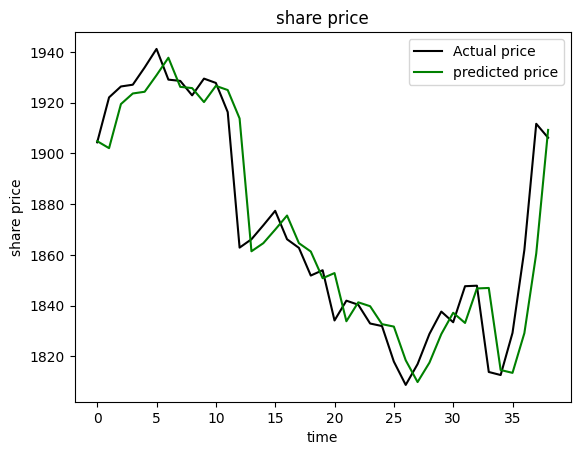

In [130]:
# 60 day 100 epochs
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()

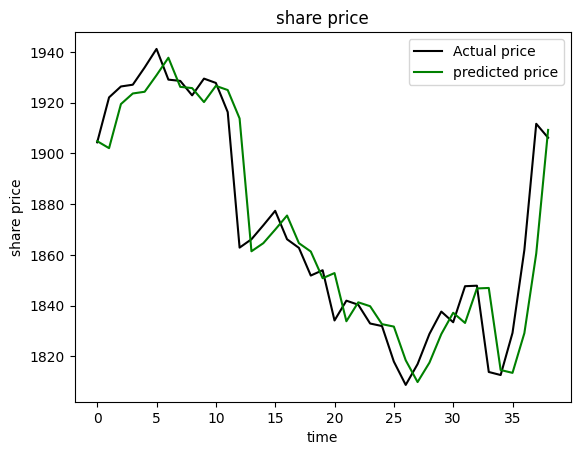

In [123]:
# 1 day 100 epochs
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()

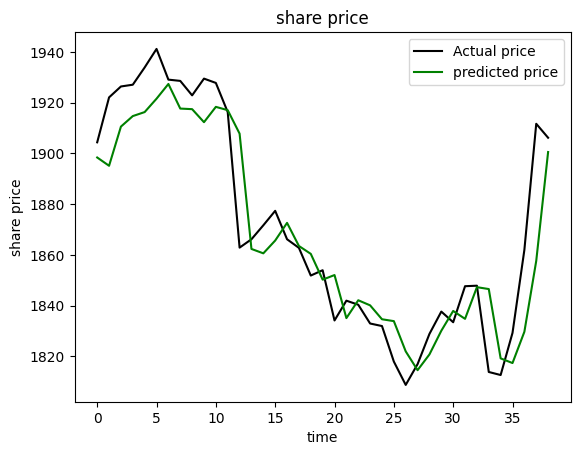

In [115]:
# 20 days 100 epochs
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()

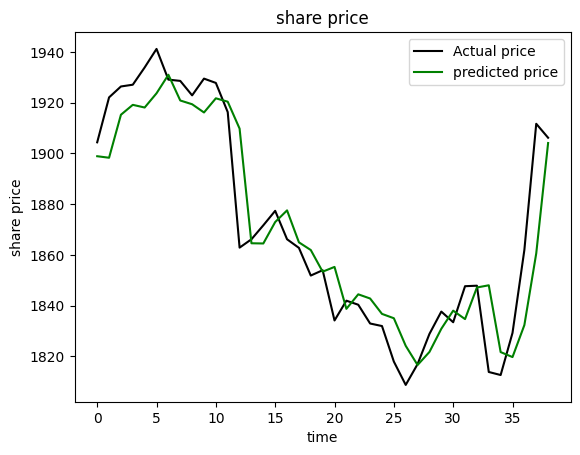

In [106]:
# 5 days 100 epochs
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()